<a href="https://colab.research.google.com/github/nhitran1709/Customer-Segmentation-with-RFM-Analysis-Python/blob/main/Tr%E1%BA%A7n_Th%E1%BB%8B_H%E1%BB%93ng_Nhi_%7C_RFM_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
path = '/content/drive/MyDrive/Colab Notebooks | Python DAC/RFM project/ecommerce retail.xlsx'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
ecommerce_retail = pd.read_excel("/content/drive/MyDrive/Colab Notebooks | Python DAC/RFM project/ecommerce retail.xlsx")

In [4]:
ecommerce_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
ecommerce_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
ecommerce_retail['InvoiceDate'] = pd.to_datetime(ecommerce_retail['InvoiceDate'])

ecommerce_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
ecommerce_retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [8]:
ecommerce_retail['InvoiceNo'].value_counts()

,count
InvoiceNo,
573585,1114
581219,749
581492,731
580729,721
558475,705
...,...
581483,1
581566,1
C581499,1


In [9]:
df_valid = ecommerce_retail[(~ecommerce_retail['InvoiceNo'].str.startswith('C', na=False))
                             & (ecommerce_retail['Quantity'] >0)
                             & (ecommerce_retail['UnitPrice'] >0)
                           ]

In [10]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


In [11]:
#Tỷ lệ số dòng dữ liệu null CusID
missing_customers = df_valid['CustomerID'].isnull().value_counts(normalize=True)
missing_customers

,proportion
CustomerID,
False,0.750577
True,0.249423


In [12]:
check_null_CusID = df_valid.copy()
check_null_CusID['Revenue'] = check_null_CusID['Quantity'] * check_null_CusID['UnitPrice']

In [13]:
revenue_null = check_null_CusID.loc[check_null_CusID['CustomerID'].isnull(), 'Revenue'].sum()

In [14]:
revenue_total = check_null_CusID['Revenue'].sum()

In [15]:
nullrevenue_ratio = revenue_null/revenue_total*100
nullrevenue_ratio # > 5% nên không loại bỏ được, ảnh hưởng tới dữ liệu nhưng sẽ tách riêng

np.float64(16.45569092026202)

In [16]:
df_valid['CustomerID'].value_counts()

,count
CustomerID,
17841.0,7847
14911.0,5675
14096.0,5111
12748.0,4595
14606.0,2700
...,...
18084.0,1
13135.0,1
16323.0,1


In [17]:
df_valid['Country'].value_counts(sort=True)

,count
Country,
United Kingdom,485123
Germany,9040
France,8407
EIRE,7890
Spain,2484
Netherlands,2359
Belgium,2031
Switzerland,1966
Portugal,1501


In [18]:
revenue_each_country = check_null_CusID.groupby('Country')['Revenue'].sum().sort_values(ascending=False).reset_index()
revenue_each_country

,Country,Revenue
0,United Kingdom,9025222.084
1,Netherlands,285446.340
2,EIRE,283453.960
3,Germany,228867.140
4,France,209715.110
5,Australia,138521.310
6,Spain,61577.110
7,Switzerland,57089.900
8,Belgium,41196.340
9,Sweden,38378.330


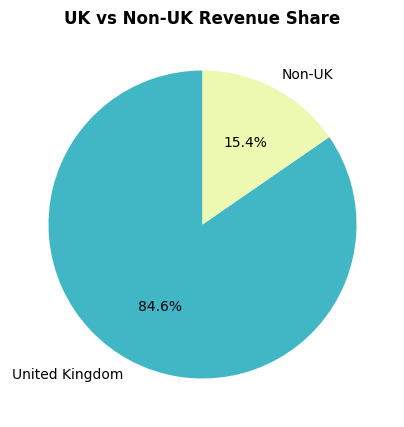

In [19]:
uk_vs_nonuk = pd.DataFrame({
    'Market': ['United Kingdom', 'Non-UK'],
    'Revenue': [revenue_each_country[revenue_each_country['Country']=='United Kingdom']['Revenue'].sum(),
                revenue_each_country[revenue_each_country['Country']!='United Kingdom']['Revenue'].sum()]
})

plt.figure(figsize=(5,5))
plt.pie(uk_vs_nonuk['Revenue'], labels=uk_vs_nonuk['Market'], autopct='%1.1f%%', startangle=90, colors=['#41B6C4', '#EDF8B1'])
plt.title('UK vs Non-UK Revenue Share', fontsize=12, weight='bold')
plt.savefig('Pie Chart - UK vs Non-UK Revenue Share.jpg', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
# from google.colab import files
# files.download('Pie Chart - UK vs Non-UK Revenue Share.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

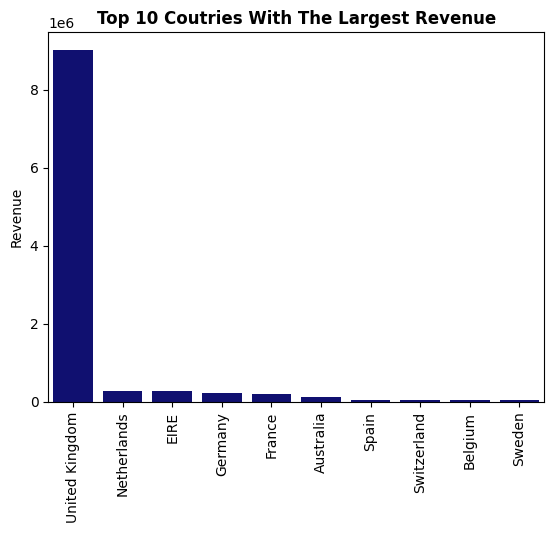

In [20]:
sns.barplot(revenue_each_country.head(10), x='Country', y='Revenue', color='navy')

plt.title('Top 10 Coutries With The Largest Revenue', weight='bold')
plt.xticks(rotation=90)
plt.xlabel('')
plt.savefig('Top_10_countries.jpg', dpi=300, bbox_inches = 'tight')
plt.show()

In [ ]:
# from google.colab import files
# files.download('Top_10_countries.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

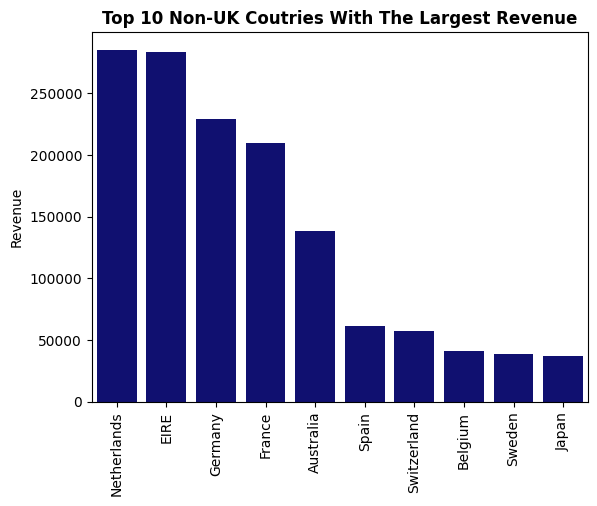

In [21]:
sns.barplot(revenue_each_country[revenue_each_country['Country']!='United Kingdom'].head(10), x='Country', y='Revenue', color='navy')

plt.title('Top 10 Non-UK Coutries With The Largest Revenue', weight='bold')
plt.xticks(rotation=90)
plt.xlabel('')
plt.savefig('Top_10_nonuk_countries.jpg', dpi=300, bbox_inches = 'tight')
plt.show()

In [ ]:
# files.download('Top_10_nonuk_countries.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **A. UK-MARKET ANALYSIS**

In [22]:
#Get rid of null CustomerID
ecommerce_retail_uk = df_valid[(df_valid['Country']=='United Kingdom') & (df_valid['CustomerID'].notnull())]
ecommerce_retail_uk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354321 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354321 non-null  object        
 1   StockCode    354321 non-null  object        
 2   Description  354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   InvoiceDate  354321 non-null  datetime64[ns]
 5   UnitPrice    354321 non-null  float64       
 6   CustomerID   354321 non-null  float64       
 7   Country      354321 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


# **1. Recency**

In [23]:
df_uk_max_purchasing_date = ecommerce_retail_uk.groupby('CustomerID')['InvoiceDate'].max().reset_index()
df_uk_max_purchasing_date.columns = ['CustomerID','MaxPurchasingDate']
df_uk_max_purchasing_date.head()

,CustomerID,MaxPurchasingDate
0,12346.0,2011-01-18 10:01:00
1,12747.0,2011-12-07 14:34:00
2,12748.0,2011-12-09 12:20:00
3,12749.0,2011-12-06 09:56:00
4,12820.0,2011-12-06 15:12:00


In [24]:
#Ngày tính của chỉ số R tính vào ngày 31/12/2011
df_uk_max_purchasing_date['Recency'] = (pd.to_datetime("2011-12-31") - df_uk_max_purchasing_date['MaxPurchasingDate']).dt.days
df_uk_max_purchasing_date.head()

,CustomerID,MaxPurchasingDate,Recency
0,12346.0,2011-01-18 10:01:00,346
1,12747.0,2011-12-07 14:34:00,23
2,12748.0,2011-12-09 12:20:00,21
3,12749.0,2011-12-06 09:56:00,24
4,12820.0,2011-12-06 15:12:00,24


In [25]:
df_uk_max_purchasing_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CustomerID         3920 non-null   float64       
 1   MaxPurchasingDate  3920 non-null   datetime64[ns]
 2   Recency            3920 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 92.0 KB


In [26]:
ecommerce_retail_uk['CustomerID'].nunique()

3920

# **2. Frequency**

In [27]:
ecommerce_retail_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [28]:
df_uk_frequency = ecommerce_retail_uk.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

In [29]:
df_uk_frequency.columns = ['CustomerID','Frequency']
df_uk_frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,11
2,12748.0,209
3,12749.0,5
4,12820.0,4


# **3. Monetary**

In [30]:
ecommerce_retail_uk['TotalRevenue'] = ecommerce_retail_uk['Quantity'] * ecommerce_retail_uk['UnitPrice']

/tmp/ipython-input-252294934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecommerce_retail_uk['TotalRevenue'] = ecommerce_retail_uk['Quantity'] * ecommerce_retail_uk['UnitPrice']


In [31]:
ecommerce_retail_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [32]:
df_uk_monetary = ecommerce_retail_uk.groupby('CustomerID')['TotalRevenue'].sum().reset_index()
df_uk_monetary.head()

,CustomerID,TotalRevenue
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34


In [33]:
df_uk_monetary.columns = ['CustomerID', 'Monetary']

In [34]:
df_uk_max_purchasing_date.head()

,CustomerID,MaxPurchasingDate,Recency
0,12346.0,2011-01-18 10:01:00,346
1,12747.0,2011-12-07 14:34:00,23
2,12748.0,2011-12-09 12:20:00,21
3,12749.0,2011-12-06 09:56:00,24
4,12820.0,2011-12-06 15:12:00,24


In [35]:
df_uk_frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,11
2,12748.0,209
3,12749.0,5
4,12820.0,4


In [36]:
df_uk_monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34


In [37]:
df_uk_rfm = (df_uk_max_purchasing_date[['CustomerID','Recency']].merge(df_uk_frequency,on='CustomerID')).merge(df_uk_monetary, on='CustomerID')
df_uk_rfm.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,346,1,77183.60
1,12747.0,23,11,4196.01
2,12748.0,21,209,33719.73
3,12749.0,24,5,4090.88
4,12820.0,24,4,942.34
5,12821.0,235,1,92.72
6,12822.0,91,2,948.88
7,12823.0,95,5,1759.50
8,12824.0,80,1,397.12
9,12826.0,23,7,1474.72


In [38]:
df_uk_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3920 non-null   float64
 1   Recency     3920 non-null   int64  
 2   Frequency   3920 non-null   int64  
 3   Monetary    3920 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 122.6 KB


In [39]:
#Recency
df_uk_rfm['R'] = pd.qcut(df_uk_rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(str)

In [40]:
#Frequency
df_uk_rfm['F'] = pd.qcut(df_uk_rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(str)

In [41]:
#Monetary
df_uk_rfm['M'] = pd.qcut(df_uk_rfm['Monetary'],5,labels=[1,2,3,4,5]).astype(str)

In [42]:
df_uk_rfm

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,346,1,77183.60,1,1,5
1,12747.0,23,11,4196.01,5,5,5
2,12748.0,21,209,33719.73,5,5,5
3,12749.0,24,5,4090.88,5,4,5
4,12820.0,24,4,942.34,5,4,4
...,...,...,...,...,...,...,...
3915,18280.0,298,1,180.60,1,2,1
3916,18281.0,201,1,80.82,1,2,1
3917,18282.0,28,2,178.05,5,3,1
3918,18283.0,24,16,2094.88,5,5,5


In [43]:
df_uk_rfm['RFM_score_uk'] = df_uk_rfm['R'].astype(str) + df_uk_rfm['F'].astype(str) + df_uk_rfm['M'].astype(str)

In [44]:
df_uk_rfm

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_score_uk
0,12346.0,346,1,77183.60,1,1,5,115
1,12747.0,23,11,4196.01,5,5,5,555
2,12748.0,21,209,33719.73,5,5,5,555
3,12749.0,24,5,4090.88,5,4,5,545
4,12820.0,24,4,942.34,5,4,4,544
...,...,...,...,...,...,...,...,...
3915,18280.0,298,1,180.60,1,2,1,121
3916,18281.0,201,1,80.82,1,2,1,121
3917,18282.0,28,2,178.05,5,3,1,531
3918,18283.0,24,16,2094.88,5,5,5,555


In [45]:
mapping_seg = pd.read_excel(path, sheet_name = 'Segmentation')

In [46]:
mapping_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    11 non-null     object
 1   RFM Score  11 non-null     object
dtypes: object(2)
memory usage: 308.0+ bytes


In [47]:
mapping_seg

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [48]:
mapping_seg['RFM Score'] = mapping_seg['RFM Score'].str.replace(' ','').str.split(',')

In [49]:
segmentation_dct = dict(zip(mapping_seg['Segment'],mapping_seg['RFM Score']))

In [50]:
segmentation_dct

{'Champions': ['555', '554', '544', '545', '454', '455', '445'],
 'Loyal': ['543', '444', '435', '355', '354', '345', '344', '335'],
 'Potential Loyalist': ['553',
  '551',
  '552',
  '541',
  '542',
  '533',
  '532',
  '531',
  '452',
  '451',
  '442',
  '441',
  '431',
  '453',
  '433',
  '432',
  '423',
  '353',
  '352',
  '351',
  '342',
  '341',
  '333',
  '323'],
 'New Customers': ['512', '511', '422', '421', '412', '411', '311'],
 'Promising': ['525',
  '524',
  '523',
  '522',
  '521',
  '515',
  '514',
  '513',
  '425',
  '424',
  '413',
  '414',
  '415',
  '315',
  '314',
  '313'],
 'Need Attention': ['535', '534', '443', '434', '343', '334', '325', '324'],
 'About To Sleep': ['331', '321', '312', '221', '213', '231', '241', '251'],
 'At Risk': ['255',
  '254',
  '245',
  '244',
  '253',
  '252',
  '243',
  '242',
  '235',
  '234',
  '225',
  '224',
  '153',
  '152',
  '145',
  '143',
  '142',
  '135',
  '134',
  '133',
  '125',
  '124'],
 'Cannot Lose Them': ['155', '154', '

In [51]:
segmentation_dct.items()

dict_items([('Champions', ['555', '554', '544', '545', '454', '455', '445']), ('Loyal', ['543', '444', '435', '355', '354', '345', '344', '335']), ('Potential Loyalist', ['553', '551', '552', '541', '542', '533', '532', '531', '452', '451', '442', '441', '431', '453', '433', '432', '423', '353', '352', '351', '342', '341', '333', '323']), ('New Customers', ['512', '511', '422', '421', '412', '411', '311']), ('Promising', ['525', '524', '523', '522', '521', '515', '514', '513', '425', '424', '413', '414', '415', '315', '314', '313']), ('Need Attention', ['535', '534', '443', '434', '343', '334', '325', '324']), ('About To Sleep', ['331', '321', '312', '221', '213', '231', '241', '251']), ('At Risk', ['255', '254', '245', '244', '253', '252', '243', '242', '235', '234', '225', '224', '153', '152', '145', '143', '142', '135', '134', '133', '125', '124']), ('Cannot Lose Them', ['155', '154', '144', '214', '215', '115', '114', '113']), ('Hibernating customers', ['332', '322', '233', '232', 

In [52]:
df_seg = pd.DataFrame([
    {'Segment': seg_name, 'RFM_Score_chuan': ','.join(score)}
    for seg_name, score in segmentation_dct.items()
])

In [53]:
df_seg

,Segment,RFM_Score_chuan
0,Champions,"555,554,544,545,454,455,445"
1,Loyal,"543,444,435,355,354,345,344,335"
2,Potential Loyalist,"553,551,552,541,542,533,532,531,452,451,442,44..."
3,New Customers,"512,511,422,421,412,411,311"
4,Promising,"525,524,523,522,521,515,514,513,425,424,413,41..."
5,Need Attention,"535,534,443,434,343,334,325,324"
6,About To Sleep,"331,321,312,221,213,231,241,251"
7,At Risk,"255,254,245,244,253,252,243,242,235,234,225,22..."
8,Cannot Lose Them,"155,154,144,214,215,115,114,113"
9,Hibernating customers,"332,322,233,232,223,222,132,123,122,212,211"


In [54]:
df_seg['RFM_Score_chuan'] = df_seg['RFM_Score_chuan'].str.split(',')

In [55]:
df_seg = df_seg.explode('RFM_Score_chuan').reset_index(drop=True)

In [56]:
df_seg

,Segment,RFM_Score_chuan
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [57]:
df_uk_rfm

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_score_uk
0,12346.0,346,1,77183.60,1,1,5,115
1,12747.0,23,11,4196.01,5,5,5,555
2,12748.0,21,209,33719.73,5,5,5,555
3,12749.0,24,5,4090.88,5,4,5,545
4,12820.0,24,4,942.34,5,4,4,544
...,...,...,...,...,...,...,...,...
3915,18280.0,298,1,180.60,1,2,1,121
3916,18281.0,201,1,80.82,1,2,1,121
3917,18282.0,28,2,178.05,5,3,1,531
3918,18283.0,24,16,2094.88,5,5,5,555


In [58]:
df_uk_rfm = pd.merge(df_uk_rfm,df_seg, how='left', left_on='RFM_score_uk', right_on='RFM_Score_chuan')

In [59]:
df_uk_rfm

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_score_uk,Segment,RFM_Score_chuan
0,12346.0,346,1,77183.60,1,1,5,115,Cannot Lose Them,115
1,12747.0,23,11,4196.01,5,5,5,555,Champions,555
2,12748.0,21,209,33719.73,5,5,5,555,Champions,555
3,12749.0,24,5,4090.88,5,4,5,545,Champions,545
4,12820.0,24,4,942.34,5,4,4,544,Champions,544
...,...,...,...,...,...,...,...,...,...,...
3915,18280.0,298,1,180.60,1,2,1,121,Lost customers,121
3916,18281.0,201,1,80.82,1,2,1,121,Lost customers,121
3917,18282.0,28,2,178.05,5,3,1,531,Potential Loyalist,531
3918,18283.0,24,16,2094.88,5,5,5,555,Champions,555


In [60]:
df_uk_rfm.drop('RFM_Score_chuan', axis=1, inplace=True)

In [61]:
df_uk_rfm

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_score_uk,Segment
0,12346.0,346,1,77183.60,1,1,5,115,Cannot Lose Them
1,12747.0,23,11,4196.01,5,5,5,555,Champions
2,12748.0,21,209,33719.73,5,5,5,555,Champions
3,12749.0,24,5,4090.88,5,4,5,545,Champions
4,12820.0,24,4,942.34,5,4,4,544,Champions
...,...,...,...,...,...,...,...,...,...
3915,18280.0,298,1,180.60,1,2,1,121,Lost customers
3916,18281.0,201,1,80.82,1,2,1,121,Lost customers
3917,18282.0,28,2,178.05,5,3,1,531,Potential Loyalist
3918,18283.0,24,16,2094.88,5,5,5,555,Champions


In [62]:
ecommerce_retail_uk['InvoiceYearMonth'] = ecommerce_retail_uk['InvoiceDate'].dt.strftime('%Y-%m')

/tmp/ipython-input-516165138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecommerce_retail_uk['InvoiceYearMonth'] = ecommerce_retail_uk['InvoiceDate'].dt.strftime('%Y-%m')


In [63]:
ecommerce_retail_uk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.40,2011-12
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.60,2011-12
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.00,2011-12
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.80,2011-12


In [64]:
revenue_monthly = ecommerce_retail_uk.groupby('InvoiceYearMonth')['TotalRevenue'].sum().reset_index()
revenue_monthly

,InvoiceYearMonth,TotalRevenue
0,2010-12,498661.850
1,2011-01,442190.060
2,2011-02,355655.630
3,2011-03,467198.590
4,2011-04,409559.141
5,2011-05,551568.820
6,2011-06,524915.480
7,2011-07,485612.251
8,2011-08,498453.320
9,2011-09,796780.272


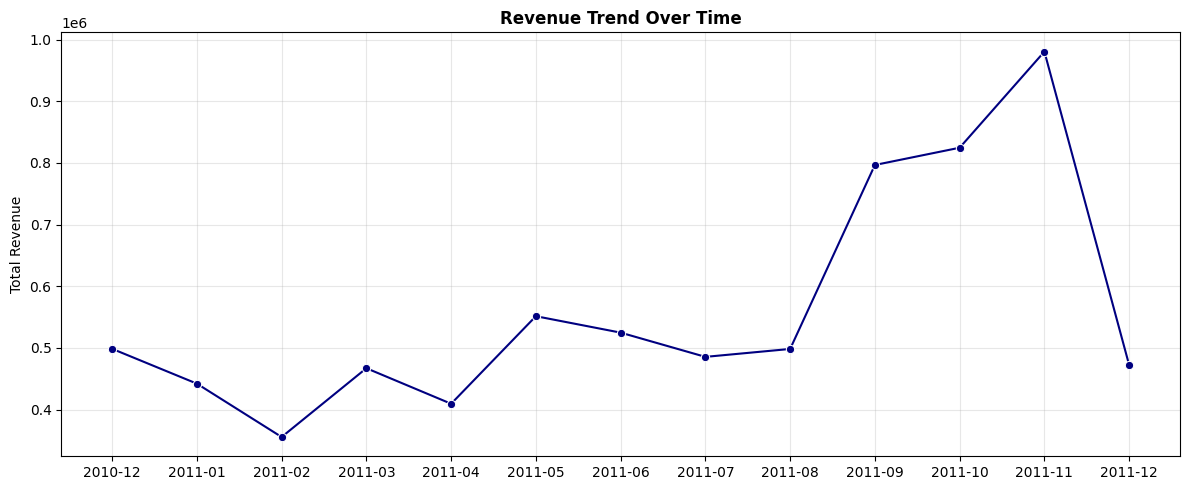

In [65]:
plt.figure(figsize=(12,5))
sns.lineplot(data=revenue_monthly, x='InvoiceYearMonth', y='TotalRevenue', marker='o', color='navy') #'#2E3A8C'

plt.title('Revenue Trend Over Time', fontsize=12, fontweight='bold')
plt.xlabel('')
plt.ylabel('Total Revenue')

plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('Revenue Trend Over Time.jpg', dpi=300, bbox_inches = 'tight')
plt.show()

In [ ]:
# files.download('Revenue Trend Over Time.jpg')

/tmp/ipython-input-3827488464.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data= df_uk_rfm, order = segment_order, palette= 'YlGnBu_r')


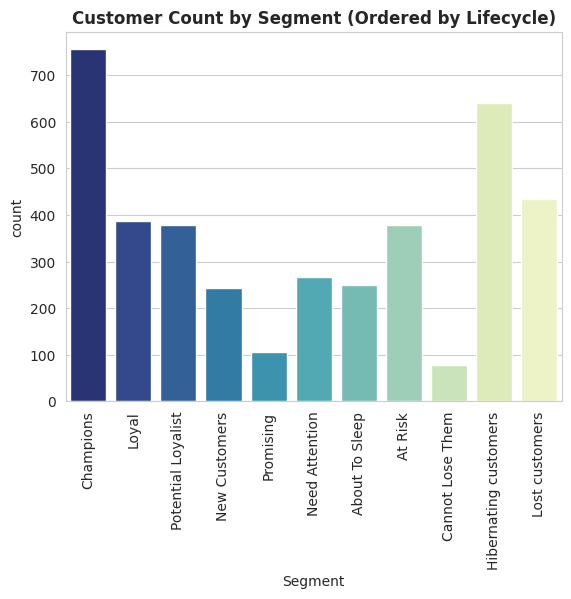

In [66]:
segment_order = [
    "Champions", "Loyal", "Potential Loyalist",
    "New Customers", "Promising", "Need Attention",
    "About To Sleep", "At Risk", "Cannot Lose Them",
    "Hibernating customers", "Lost customers"]

sns.set_style('whitegrid')
sns.countplot(x='Segment', data= df_uk_rfm, order = segment_order, palette= 'YlGnBu_r')
plt.title('Customer Count by Segment (Ordered by Lifecycle)', weight='bold')
plt.xticks(rotation=90)

plt.savefig('Customer Count by Segment.jpg', dpi=300, bbox_inches = 'tight')
plt.show()

In [ ]:
# files.download('Customer Count by Segment.jpg')

In [67]:
rfm_heatmap = df_uk_rfm.pivot_table(index='R', columns='F', values='Monetary', aggfunc='mean')

In [68]:
rfm_heatmap

F,1,2,3,4,5
R,,,,,
1,533.590154,344.946707,1233.569528,895.451364,2470.597273
2,378.857104,454.757283,818.525424,1279.571456,2926.426250
3,366.613158,488.786047,834.704529,1402.537033,3846.646000
4,264.759070,427.807706,766.389032,1336.989871,3997.194554
5,374.822105,537.033404,2123.461395,1386.398514,8208.970920


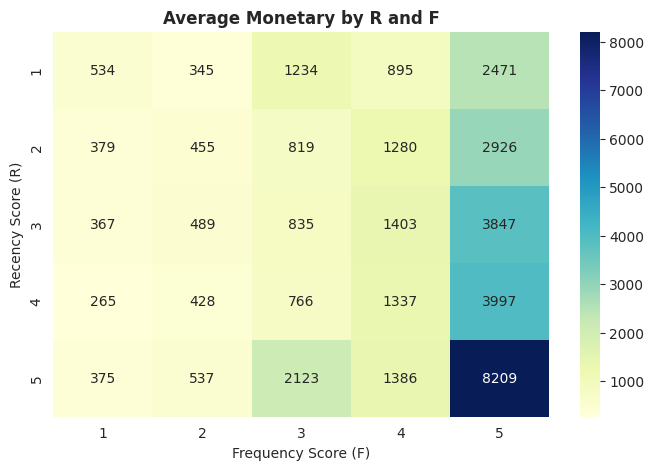

In [69]:
plt.figure(figsize=(8,5))
sns.heatmap(rfm_heatmap, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Average Monetary by R and F', weight='bold')
plt.xlabel('Frequency Score (F)')
plt.ylabel('Recency Score (R)')
plt.savefig('Heatmap.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# files.download('Heatmap.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

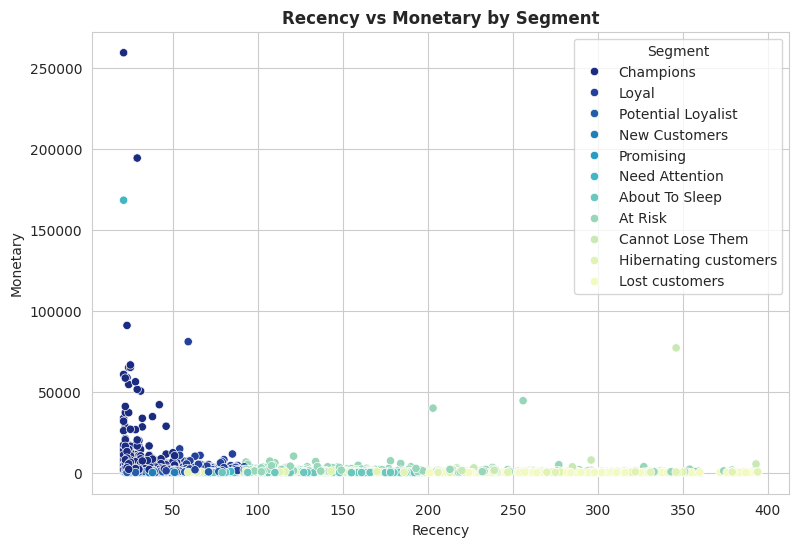

In [70]:
plt.figure(figsize=(9,6))
sns.scatterplot(data= df_uk_rfm, x= 'Recency', y='Monetary', hue='Segment', hue_order= segment_order,palette= 'YlGnBu_r')
plt.title('Recency vs Monetary by Segment', fontsize=12, weight = 'bold')
plt.savefig('Scatter.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# files.download('Scatter.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# data=df_uk_rfm['Recency'].plot.hist()
# plt.show()

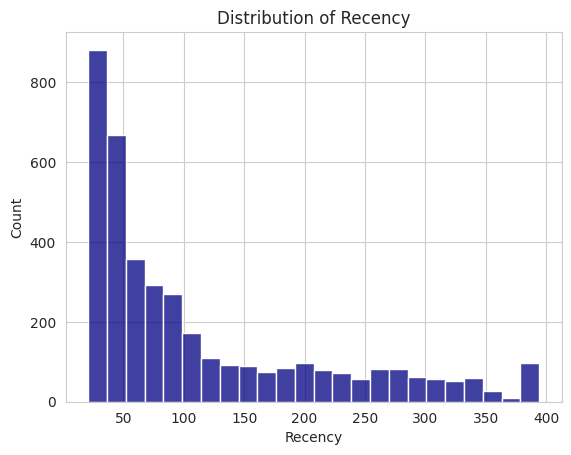

In [71]:
sns.histplot(data=df_uk_rfm['Recency'],color='navy')
plt.title('Distribution of Recency')
plt.savefig('Distribution R.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# files.download('Distribution R.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

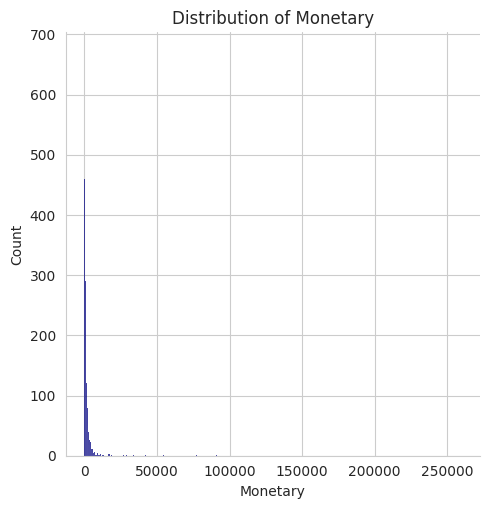

In [72]:
sns.displot(data=df_uk_rfm['Monetary'], color='Navy')

plt.title('Distribution of Monetary')
plt.savefig('Distribution M.jpg', dpi=300, bbox_inches='tight')

In [ ]:
# files.download('Distribution M.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

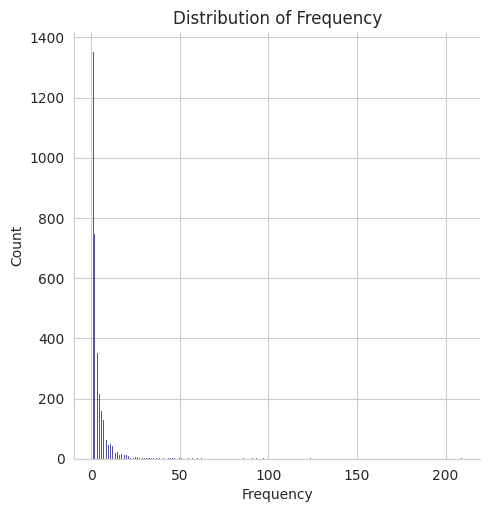

In [73]:
sns.displot(data=df_uk_rfm['Frequency'], color='Navy')

plt.title('Distribution of Frequency')
plt.savefig('Distribution F.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# files.download('Distribution F.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

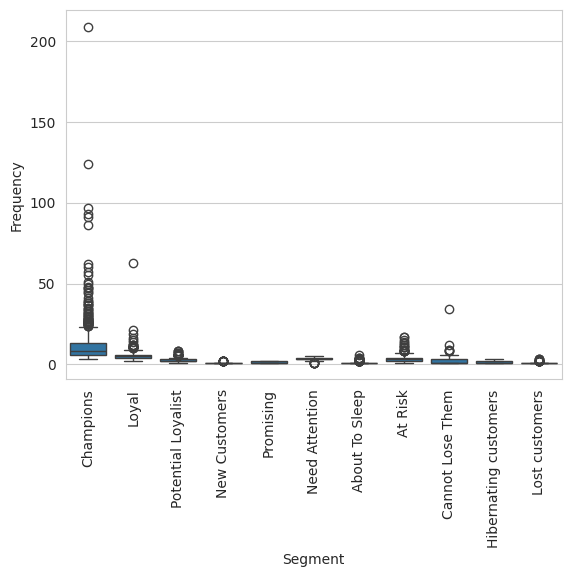

In [74]:
sns.boxplot(data=df_uk_rfm, x='Segment', y='Frequency', order=segment_order)
plt.xticks(rotation=90)
plt.show()

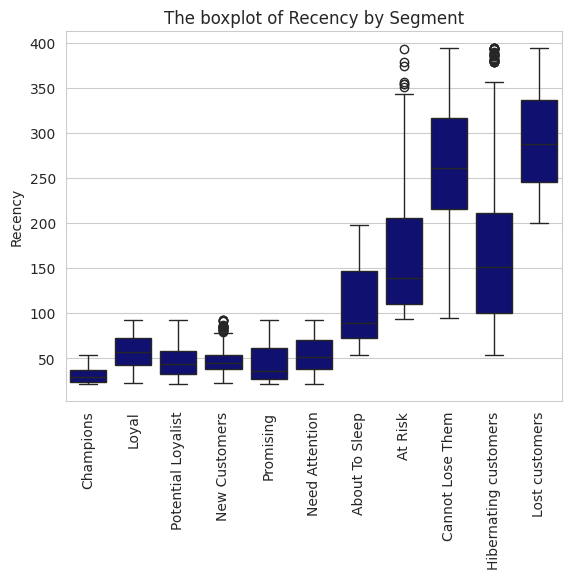

In [75]:
sns.boxplot(data=df_uk_rfm, x='Segment', y='Recency', order=segment_order, color='navy')
plt.xticks(rotation=90)
plt.title('The boxplot of Recency by Segment')
plt.xlabel('')
plt.savefig('boxplot R.jpg', dpi=300, bbox_inches='tight')

In [ ]:
# files.download('boxplot R.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
rfm_uk_monetary = df_uk_rfm.groupby('Segment')['Monetary'].agg(['sum','mean']).reset_index()
rfm_uk_monetary.columns = ['Segment','TotalRevenue','AvgRevenue']

In [77]:
rfm_uk_monetary

,Segment,TotalRevenue,AvgRevenue
0,About To Sleep,66900.430,267.601720
1,At Risk,644788.681,1705.790161
2,Cannot Lose Them,172298.470,2180.993291
3,Champions,4448395.590,5891.914689
4,Hibernating customers,249973.872,390.584175
5,Lost customers,83228.790,191.330552
6,Loyal,869359.620,2246.407287
7,Need Attention,445273.271,1667.690154
8,New Customers,51305.380,210.267951
9,Potential Loyalist,199364.480,527.419259


/tmp/ipython-input-4051461934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rfm_uk_monetary, y='Segment', x='TotalRevenue', order=segment_order, width=0.85, palette='YlGnBu_r')


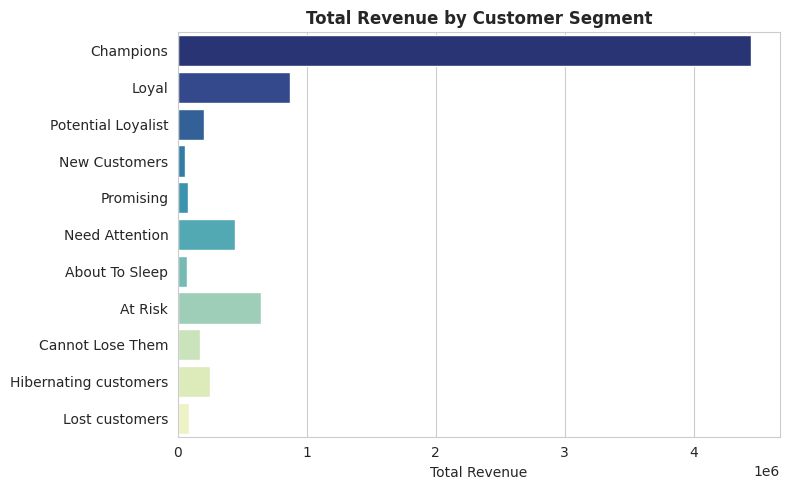

In [78]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.barplot(data=rfm_uk_monetary, y='Segment', x='TotalRevenue', order=segment_order, width=0.85, palette='YlGnBu_r')

# for i, v in enumerate(rfm_uk_monetary['TotalRevenue']):
#     plt.text(v, i, f'{v:,.0f}', va='center', fontsize=9)

plt.title('Total Revenue by Customer Segment', fontsize=12, weight = 'bold')
plt.xlabel('Total Revenue')
plt.ylabel('')
plt.tight_layout()
plt.savefig('Total Rev by Seg.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# files.download('Total Rev by Seg.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-3951427698.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rfm_uk_monetary, y='Segment', x='AvgRevenue', order=segment_order, width=0.85, palette='YlGnBu_r')


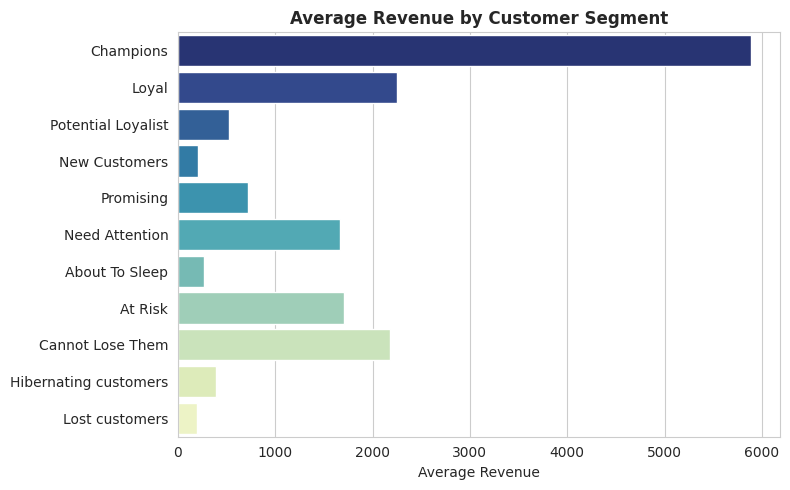

In [79]:
fig, ax = plt.subplots(figsize=(8,5))
sns.set_style('whitegrid')
sns.barplot(data=rfm_uk_monetary, y='Segment', x='AvgRevenue', order=segment_order, width=0.85, palette='YlGnBu_r')

# for i, v in enumerate(rfm_uk_monetary['AvgRevenue']):
#   ax.text(v + (max(rfm_uk_monetary['AvgRevenue']) * 0.03), i, f'{v:,.0f}', va='center', ha='right')

plt.title('Average Revenue by Customer Segment', fontsize=12, weight = 'bold')
plt.xlabel('Average Revenue')
plt.ylabel('')
plt.tight_layout()
plt.savefig('Avg Rev by Seg.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# files.download('Avg Rev by Seg.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [80]:
rfm_uk_monetary

,Segment,TotalRevenue,AvgRevenue
0,About To Sleep,66900.430,267.601720
1,At Risk,644788.681,1705.790161
2,Cannot Lose Them,172298.470,2180.993291
3,Champions,4448395.590,5891.914689
4,Hibernating customers,249973.872,390.584175
5,Lost customers,83228.790,191.330552
6,Loyal,869359.620,2246.407287
7,Need Attention,445273.271,1667.690154
8,New Customers,51305.380,210.267951
9,Potential Loyalist,199364.480,527.419259


In [81]:
rfm_uk_monetary['Proportion_%Rev'] = rfm_uk_monetary['TotalRevenue'] / rfm_uk_monetary['TotalRevenue'].sum()*100

In [82]:
rfm_uk_monetary

,Segment,TotalRevenue,AvgRevenue,Proportion_%Rev
0,About To Sleep,66900.430,267.601720,0.915392
1,At Risk,644788.681,1705.790161,8.822580
2,Cannot Lose Them,172298.470,2180.993291,2.357543
3,Champions,4448395.590,5891.914689,60.866958
4,Hibernating customers,249973.872,390.584175,3.420368
5,Lost customers,83228.790,191.330552,1.138811
6,Loyal,869359.620,2246.407287,11.895362
7,Need Attention,445273.271,1667.690154,6.092630
8,New Customers,51305.380,210.267951,0.702006
9,Potential Loyalist,199364.480,527.419259,2.727884


In [83]:
!pip install squarify

In [84]:
import squarify
import numpy as np

In [85]:
colors = plt.cm.YlGnBu(np.linspace(0, 1, 11))

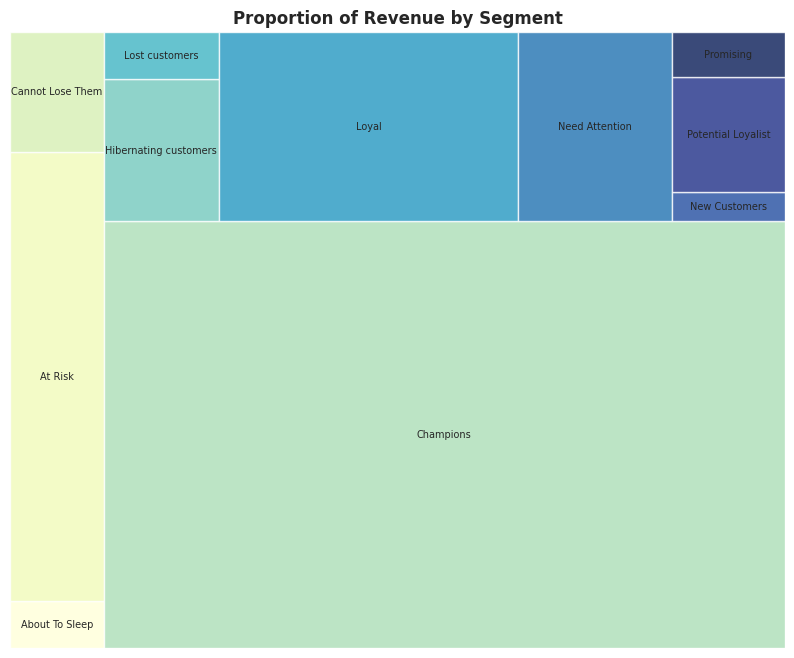

In [86]:
plt.figure(figsize=(10, 8))
squarify.plot(
    sizes=rfm_uk_monetary['Proportion_%Rev'],
    label=rfm_uk_monetary['Segment'],
    color=colors,
    alpha=0.8,
    text_kwargs={'fontsize': 7}
)
plt.title('Proportion of Revenue by Segment', fontsize=12, weight='bold')
plt.axis('off')
plt.savefig('treemap.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# files.download('treemap.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **B. Non-UK Market Analysis**

In [87]:
df_valid

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [88]:
ecommerce_retail_nonuk = df_valid[(df_valid['Country']!='United Kingdom') & (df_valid['CustomerID'].notnull())]
ecommerce_retail_nonuk

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [89]:
df_nonuk_max_purchasing_date = ecommerce_retail_nonuk.groupby('CustomerID')['InvoiceDate'].max().reset_index()
df_nonuk_max_purchasing_date.columns = ['CustomerID','MaxPurchasingDate']

In [90]:
#Ngày tính của chỉ số R tính vào ngày 31/12/2011
df_nonuk_max_purchasing_date['Recency'] = (pd.to_datetime("2011-12-31") - df_uk_max_purchasing_date['MaxPurchasingDate']).dt.days
df_nonuk_max_purchasing_date

,CustomerID,MaxPurchasingDate,Recency
0,12347.0,2011-12-07 15:52:00,346
1,12348.0,2011-09-25 13:13:00,23
2,12349.0,2011-11-21 09:51:00,21
3,12350.0,2011-02-02 16:01:00,24
4,12352.0,2011-11-03 14:37:00,24
...,...,...,...
413,17444.0,2011-07-15 12:05:00,95
414,17508.0,2011-03-04 08:10:00,224
415,17828.0,2011-11-17 08:41:00,22
416,17829.0,2011-02-14 12:46:00,206


In [91]:
df_nonuk_frequency = ecommerce_retail_nonuk.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
df_nonuk_frequency.columns = ['CustomerID', 'Frequency']
df_nonuk_frequency

,CustomerID,Frequency
0,12347.0,7
1,12348.0,4
2,12349.0,1
3,12350.0,1
4,12352.0,8
...,...,...
413,17444.0,3
414,17508.0,1
415,17828.0,4
416,17829.0,1


In [92]:
ecommerce_retail_nonuk['TotalRevenue'] = ecommerce_retail_nonuk['Quantity'] * ecommerce_retail_nonuk['UnitPrice']

/tmp/ipython-input-1850350315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ecommerce_retail_nonuk['TotalRevenue'] = ecommerce_retail_nonuk['Quantity'] * ecommerce_retail_nonuk['UnitPrice']


In [93]:
df_nonuk_monetary = ecommerce_retail_nonuk.groupby('CustomerID')['TotalRevenue'].sum().reset_index()

In [94]:
df_nonuk_monetary.columns = ['CustomerID','Monetary']

In [95]:
df_nonuk_rfm = (df_nonuk_max_purchasing_date[['CustomerID','Recency']].merge(df_nonuk_frequency,on='CustomerID')).merge(df_nonuk_monetary, on='CustomerID')
df_nonuk_rfm

,CustomerID,Recency,Frequency,Monetary
0,12347.0,346,7,4310.00
1,12348.0,23,4,1797.24
2,12349.0,21,1,1757.55
3,12350.0,24,1,334.40
4,12352.0,24,8,2506.04
...,...,...,...,...
413,17444.0,95,3,2940.04
414,17508.0,224,1,387.31
415,17828.0,22,4,1820.09
416,17829.0,206,1,889.24


In [96]:
#Recency
df_nonuk_rfm['R'] = pd.qcut(df_nonuk_rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(str)
#Frequency
df_nonuk_rfm['F'] = pd.qcut(df_nonuk_rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(str)
#Monetary
df_nonuk_rfm['M'] = pd.qcut(df_nonuk_rfm['Monetary'],5,labels=[1,2,3,4,5]).astype(str)

In [97]:
df_nonuk_rfm['RFM_score_nonuk'] = df_nonuk_rfm['R'].astype(str) + df_nonuk_rfm['F'].astype(str) + df_nonuk_rfm['M'].astype(str)
df_nonuk_rfm = pd.merge(df_nonuk_rfm,df_seg, how='left', left_on='RFM_score_nonuk', right_on='RFM_Score_chuan')
df_nonuk_rfm.drop('RFM_Score_chuan', axis=1, inplace=True)
df_nonuk_rfm


,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_score_nonuk,Segment
0,12347.0,346,7,4310.00,1,5,5,155,Cannot Lose Them
1,12348.0,23,4,1797.24,5,4,4,544,Champions
2,12349.0,21,1,1757.55,5,1,4,514,Promising
3,12350.0,24,1,334.40,5,1,1,511,New Customers
4,12352.0,24,8,2506.04,5,5,4,554,Champions
...,...,...,...,...,...,...,...,...,...
413,17444.0,95,3,2940.04,3,4,4,344,Loyal
414,17508.0,224,1,387.31,1,2,1,121,Lost customers
415,17828.0,22,4,1820.09,5,4,4,544,Champions
416,17829.0,206,1,889.24,1,2,3,123,Hibernating customers


/tmp/ipython-input-3299658366.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data= df_nonuk_rfm, order = segment_order, palette= 'YlGnBu_r')


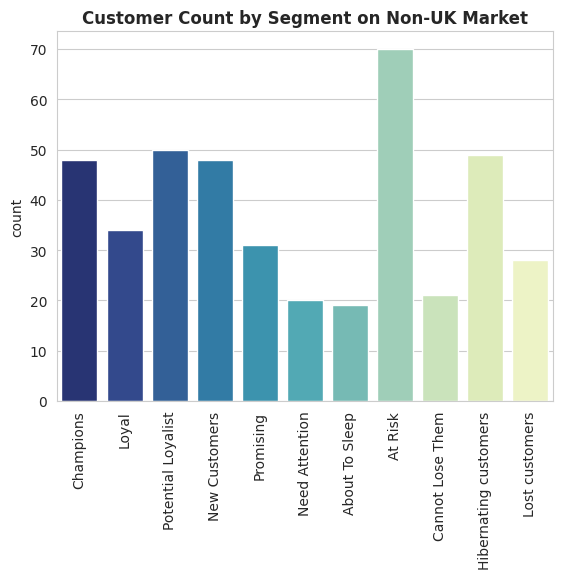

In [98]:
sns.countplot(x='Segment', data= df_nonuk_rfm, order = segment_order, palette= 'YlGnBu_r')
plt.title('Customer Count by Segment on Non-UK Market', weight='bold')
plt.xticks(rotation=90)
plt.xlabel('')

plt.savefig('Customer Count by Segment on Non-UK Market.jpg', dpi=300, bbox_inches = 'tight')
plt.show()

In [ ]:
# files.download('Customer Count by Segment on Non-UK Market.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [99]:
rfm_nonuk_monetary = df_nonuk_rfm.groupby('Segment')['Monetary'].sum().reset_index()

/tmp/ipython-input-2195040433.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rfm_nonuk_monetary, y='Segment', x='Monetary', order=segment_order, width=0.85, palette='YlGnBu_r')


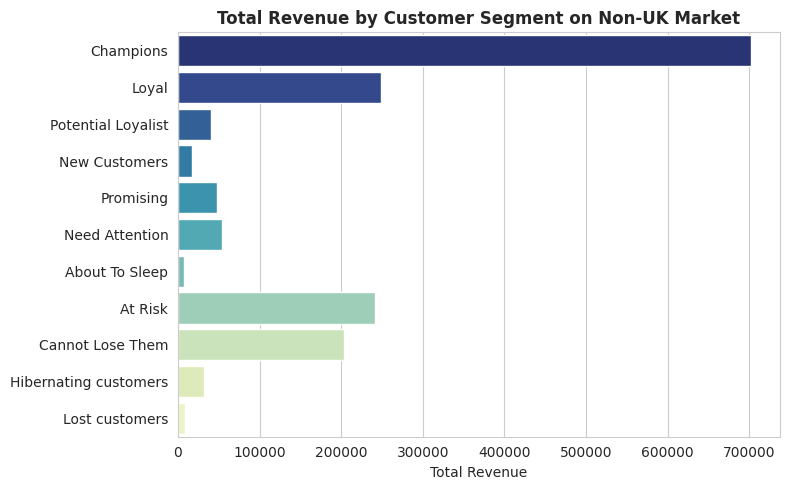

In [100]:
plt.figure(figsize=(8,5))

sns.barplot(data=rfm_nonuk_monetary, y='Segment', x='Monetary', order=segment_order, width=0.85, palette='YlGnBu_r')

plt.title('Total Revenue by Customer Segment on Non-UK Market', fontsize=12, weight = 'bold')
plt.xlabel('Total Revenue')
plt.ylabel('')
plt.tight_layout()
plt.savefig('Total Rev by Seg on Non-UK Market.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# files.download('Total Rev by Seg on Non-UK Market.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

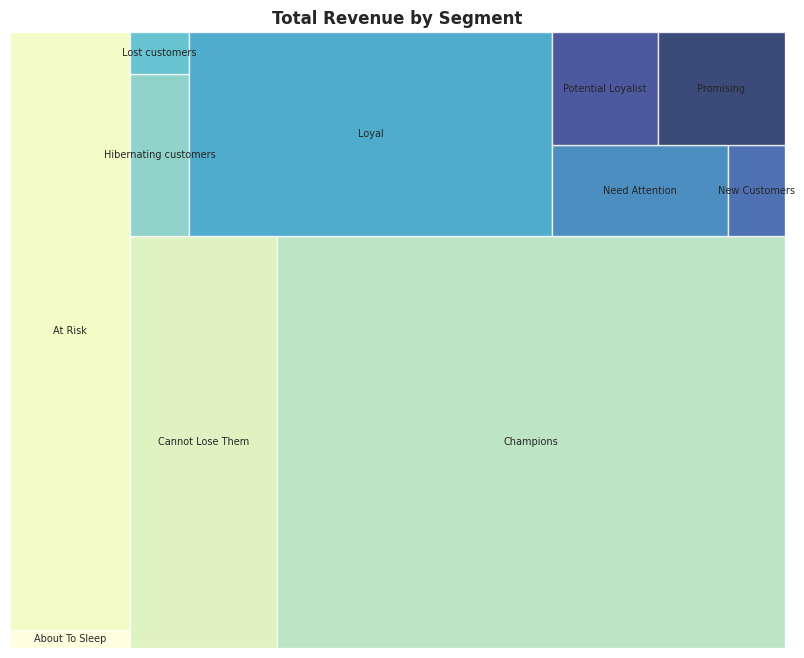

In [101]:
plt.figure(figsize=(10, 8))
squarify.plot(
    sizes=rfm_nonuk_monetary['Monetary'],
    label=rfm_nonuk_monetary['Segment'],
    color=colors,
    alpha=0.8,
    text_kwargs={'fontsize': 7}
)
plt.title('Total Revenue by Segment', fontsize=12, weight='bold')
plt.axis('off')
plt.savefig('treemap.jpg', dpi=300, bbox_inches='tight')
plt.show()